In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('data.csv')  # read csv
X = data.iloc[:, :25]  # X feature
X

,MA,FA,Cs,Pb,Sn,Other,I,Br,Gap,Po,...,Add_H,Step,Solvent,Coated1_v,Coated1_t,Coated2_v,Coated2_t,Antisolvent,Anneal_T,Anneal_t
0,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.615970,1,...,0,0.5,0.75,0.500,0.222222,0.000000,0.000000,1,0.285714,0.022222
1,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.615970,0,...,0,0.5,0.75,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
2,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
3,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
4,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.3,0.70,0.50,0.5,0.5,0.0,1.0,0.0,0.482890,0,...,1,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
616,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
617,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
618,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111


### **J_sc**

Best Parameters for jsc: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 10.4508, RMSE: 3.2328, R²: 0.7703, MAE:1.5907209800558102
Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Test R²: 0.857165730073049
Mean Test Neg MSE: -5.566575885697356
Std Test R²: 0.03867549117069594
Std Test Neg MSE: 2.2280231957370917
--------------------------------------------------
Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Test R²: 0.857165730073049
Mean Test Neg MSE: -5.566575885697356
Std Test R²: 0.03867549117069594
Std Test Neg MSE: 2.2280231957370917
--------------------------------------------------
Params: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Test R²: 0.857165730073049
Mean Test Neg MSE: -5.56657588

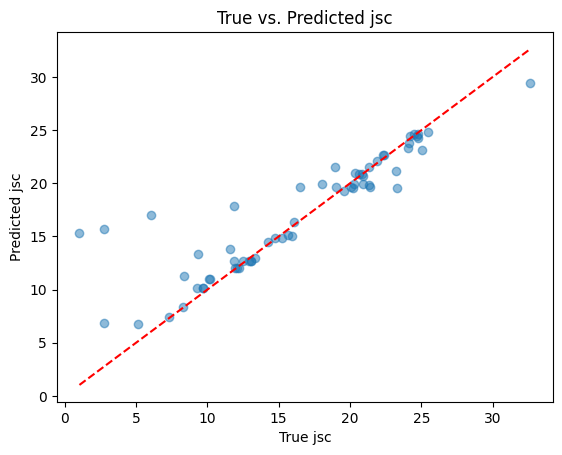

In [12]:
# 1. data split
X_jsc = data.iloc[:, :25]  # X feature
y_jsc = data['Jsc']  # target feature
X_jsc_train, X_jsc_test, y_jsc_train, y_jsc_test = train_test_split(X_jsc, y_jsc, test_size=0.1, random_state=42)

# 2. random forest model
rf = RandomForestRegressor(random_state=42)

# parameter grid
param_grid_jsc = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [ 2, 3],
    'min_samples_leaf': [2, 3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Grid searching for jsc
grid_jsc_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_jsc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_jsc_search.fit(X_jsc_train, y_jsc_train)

# Best model for jsc
best_rf_jsc = grid_jsc_search.best_estimator_


# 4. Model evaluation on test set for jsc
y_jsc_pred = best_rf_jsc.predict(X_jsc_test)
mse_jsc = mean_squared_error(y_jsc_test, y_jsc_pred)
rmse_jsc = mse_jsc**0.5
mae_jsc = mean_absolute_error(y_jsc_test, y_jsc_pred)
r2_jsc = r2_score(y_jsc_test, y_jsc_pred)

print(f"Best Parameters for jsc: {grid_jsc_search.best_params_}")
print(f"MSE: {mse_jsc:.4f}, RMSE: {rmse_jsc:.4f}, R²: {r2_jsc:.4f}, MAE:{mae_jsc}")

# 5. Get cross-validation results for jsc
cv_jsc_results_df = pd.DataFrame(grid_jsc_search.cv_results_)
cv_jsc_results_df = cv_jsc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for jsc
best_cv_jsc_score_r2 = grid_jsc_search.best_score_
best_cv_jsc_score_neg_mse = -grid_jsc_search.cv_results_['mean_test_neg_mse'][grid_jsc_search.best_index_]

for index, row in cv_jsc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

    
    
print(f"Best Cross-Validation R² for jsc: {best_cv_jsc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for jsc: {best_cv_jsc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for jsc: {grid_jsc_search.best_params_}")

# 6. Visualization for jsc
plt.scatter(y_jsc_test, y_jsc_pred, alpha=0.5)
plt.plot([y_jsc_test.min(), y_jsc_test.max()], [y_jsc_test.min(), y_jsc_test.max()], 'r--')
plt.xlabel('True jsc')
plt.ylabel('Predicted jsc')
plt.title('True vs. Predicted jsc')
plt.show()

### **Voc**

Best Parameters for voc: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
MSE: 0.0132, RMSE: 0.1148, R²: 0.8736, MAE:0.06149668256153783
Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Test R²: 0.9368891987862474
Mean Test Neg MSE: -0.005666753513163587
Std Test R²: 0.013360041210865998
Std Test Neg MSE: 0.0013808563358555636
--------------------------------------------------
Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Test R²: 0.9367923305123724
Mean Test Neg MSE: -0.005675637696702302
Std Test R²: 0.013435441782259748
Std Test Neg MSE: 0.0013886248753152179
--------------------------------------------------
Params: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Test R²: 0.9367923305123724
Mean Test Neg M

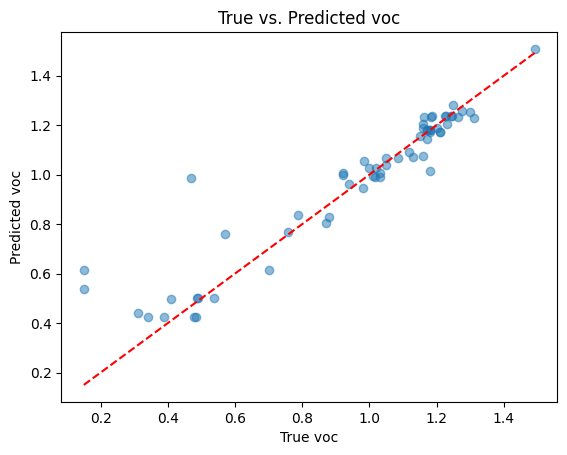

In [13]:
# 1. data split
X_voc = data.iloc[:, :25]  # X feature
y_voc = data['Voc']  # target feature
X_voc_train, X_voc_test, y_voc_train, y_voc_test = train_test_split(X_voc, y_voc, test_size=0.1, random_state=42)

# 2. random forest model
rf = RandomForestRegressor(random_state=42)

# parameter grid
param_grid_voc = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Grid searching for voc
grid_voc_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_voc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_voc_search.fit(X_voc_train, y_voc_train)

# Best model for voc
best_rf_voc = grid_voc_search.best_estimator_

# 4. Model evaluation on test set for voc
y_voc_pred = best_rf_voc.predict(X_voc_test)
mse_voc = mean_squared_error(y_voc_test, y_voc_pred)
rmse_voc = mse_voc**0.5
mae_voc = mean_absolute_error(y_voc_test, y_voc_pred)
r2_voc = r2_score(y_voc_test, y_voc_pred)

print(f"Best Parameters for voc: {grid_voc_search.best_params_}")
print(f"MSE: {mse_voc:.4f}, RMSE: {rmse_voc:.4f}, R²: {r2_voc:.4f}, MAE:{mae_voc}")

# 5. Get cross-validation results for voc
cv_voc_results_df = pd.DataFrame(grid_voc_search.cv_results_)
cv_voc_results_df = cv_voc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for voc
best_cv_voc_score_r2 = grid_voc_search.best_score_
best_cv_voc_score_neg_mse = -grid_voc_search.cv_results_['mean_test_neg_mse'][grid_voc_search.best_index_]

for index, row in cv_voc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for voc: {best_cv_voc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for voc: {best_cv_voc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for voc: {grid_voc_search.best_params_}")

# 6. Visualization for voc
plt.scatter(y_voc_test, y_voc_pred, alpha=0.5)
plt.plot([y_voc_test.min(), y_voc_test.max()], [y_voc_test.min(), y_voc_test.max()], 'r--')
plt.xlabel('True voc')
plt.ylabel('Predicted voc')
plt.title('True vs. Predicted voc')
plt.show()

### **FF**

Best Parameters for ff: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
MSE: 0.0039, RMSE: 0.0628, R²: 0.5534, MAE:0.042683831152062805
Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Mean Test R²: 0.6517743702464616
Mean Test Neg MSE: -0.003333160257654808
Std Test R²: 0.0633356716994307
Std Test Neg MSE: 0.0007249781530285947
--------------------------------------------------
Params: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Mean Test R²: 0.6517743702464616
Mean Test Neg MSE: -0.003333160257654808
Std Test R²: 0.0633356716994307
Std Test Neg MSE: 0.0007249781530285947
--------------------------------------------------
Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Mean Test R²: 0.6517189524139535
Mean Test Neg MSE

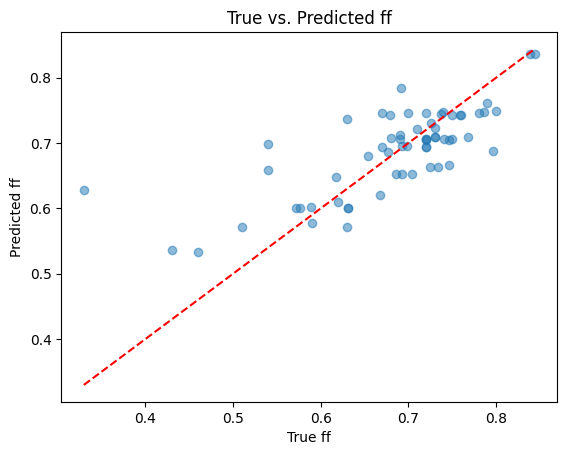

In [14]:
# 1. data split
X_ff = data.iloc[:, :25]  # X feature
y_ff = data['FF']  # target feature
X_ff_train, X_ff_test, y_ff_train, y_ff_test = train_test_split(X_ff, y_ff, test_size=0.1, random_state=42)

# 2. random forest model
rf = RandomForestRegressor(random_state=42)

# parameter grid
param_grid_ff = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Grid searching for ff
grid_ff_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_ff,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_ff_search.fit(X_ff_train, y_ff_train)

# Best model for ff
best_rf_ff = grid_ff_search.best_estimator_

# 4. Model evaluation on test set for ff
y_ff_pred = best_rf_ff.predict(X_ff_test)
mse_ff = mean_squared_error(y_ff_test, y_ff_pred)
rmse_ff = mse_ff**0.5
mae_ff = mean_absolute_error(y_ff_test, y_ff_pred)
r2_ff = r2_score(y_ff_test, y_ff_pred)

print(f"Best Parameters for ff: {grid_ff_search.best_params_}")
print(f"MSE: {mse_ff:.4f}, RMSE: {rmse_ff:.4f}, R²: {r2_ff:.4f}, MAE:{mae_ff}")

# 5. Get cross-validation results for ff
cv_ff_results_df = pd.DataFrame(grid_ff_search.cv_results_)
cv_ff_results_df = cv_ff_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for ff
best_cv_ff_score_r2 = grid_ff_search.best_score_
best_cv_ff_score_neg_mse = -grid_ff_search.cv_results_['mean_test_neg_mse'][grid_ff_search.best_index_]

for index, row in cv_ff_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for ff: {best_cv_ff_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for ff: {best_cv_ff_score_neg_mse}")
print(f"Best parameters via GridSearchCV for ff: {grid_ff_search.best_params_}")

# 6. Visualization for ff
plt.scatter(y_ff_test, y_ff_pred, alpha=0.5)
plt.plot([y_ff_test.min(), y_ff_test.max()], [y_ff_test.min(), y_ff_test.max()], 'r--')
plt.xlabel('True ff')
plt.ylabel('Predicted ff')
plt.title('True vs. Predicted ff')
plt.show()

### **PCE (%)**

Best Parameters for pce: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 4.6380, RMSE: 2.1536, MAE:1.494793, R²: 0.8862 
Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Test R²: 0.8894028521112937
Mean Test Neg MSE: -3.9256985239948996
Std Test R²: 0.044821835097974654
Std Test Neg MSE: 1.59271169956793
--------------------------------------------------
Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Test R²: 0.8893977538280217
Mean Test Neg MSE: -3.9258803863745846
Std Test R²: 0.04482238090407233
Std Test Neg MSE: 1.5927334645611286
--------------------------------------------------
Params: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Test R²: 0.8893977538280217
Mean Test Neg MSE: -3.9258803863745846

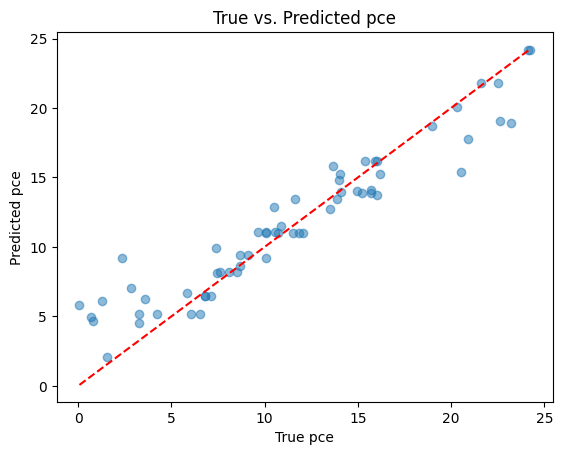

In [15]:
# 1. data split
X_pce = data.iloc[:, :25]  # X feature
y_pce = data['PCE']  # target feature
X_pce_train, X_pce_test, y_pce_train, y_pce_test = train_test_split(X_pce, y_pce, test_size=0.1, random_state=42)

# 2. random forest model
rf = RandomForestRegressor(random_state=42)

# parameter grid
param_grid_pce = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Grid searching for pce
grid_pce_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_pce,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_pce_search.fit(X_pce_train, y_pce_train)

# Best model for pce
best_rf_pce = grid_pce_search.best_estimator_

# 4. Model evaluation on test set for pce
y_pce_pred = best_rf_pce.predict(X_pce_test)
mse_pce = mean_squared_error(y_pce_test, y_pce_pred)
rmse_pce = mse_pce**0.5
mae_pce = mean_absolute_error(y_pce_test, y_pce_pred)
r2_pce = r2_score(y_pce_test, y_pce_pred)

print(f"Best Parameters for pce: {grid_pce_search.best_params_}")
print(f"MSE: {mse_pce:.4f}, RMSE: {rmse_pce:.4f}, MAE:{mae_pce:4f}, R²: {r2_pce:.4f} ")

# 5. Get cross-validation results for pce
cv_pce_results_df = pd.DataFrame(grid_pce_search.cv_results_)
cv_pce_results_df = cv_pce_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for pce
best_cv_pce_score_r2 = grid_pce_search.best_score_
best_cv_pce_score_neg_mse = -grid_pce_search.cv_results_['mean_test_neg_mse'][grid_pce_search.best_index_]

for index, row in cv_pce_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for pce: {best_cv_pce_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for pce: {best_cv_pce_score_neg_mse}")
print(f"Best parameters via GridSearchCV for pce: {grid_pce_search.best_params_}")

# 6. Visualization for pce
plt.scatter(y_pce_test, y_pce_pred, alpha=0.5)
plt.plot([y_pce_test.min(), y_pce_test.max()], [y_pce_test.min(), y_pce_test.max()], 'r--')
plt.xlabel('True pce')
plt.ylabel('Predicted pce')
plt.title('True vs. Predicted pce')
plt.show()